<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/MIAAD_Mate_Pregunta_04_Datos_Academicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 1: Preparación del Entorno y Carga de Datos

En esta sección, importamos todas las bibliotecas necesarias y cargamos la matriz de calificaciones de los estudiantes con los pesos de las asignaturas. Esto es fundamental para todo el análisis que viene.

In [13]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fractions import Fraction
from sympy import Matrix
from IPython.display import display, HTML

# Datos de tu matriz de calificaciones
data = {
    'Asignatura': ['Literatura', 'Historia', 'Matemáticas', 'Física', 'Química', 'Sociedad', 'Lenguas extranjeras', 'Matemáticas Aplicadas', 'Proyecto social', 'Desarrollo físico'],
    'Peso': [0.12, 0.08, 0.17, 0.17, 0.1, 0.03, 0.04, 0.04, 0.05, 0.2],
    '202501': [3.5, 8.5, 3.4, 9.8, 7.2, 6.0, 4.0, 6.12, 5.04, 6.94],
    '202502': [4.1, 4.8, 4.5, 8.3, 5.5, 4.45, 4.17, 5.49, 4.34, 7.255],
    '202503': [9.5, 3.2, 6.3, 7.5, 5.3, 6.35, 8.87, 5.73, 5.3, 7.135],
    '202504': [5.8, 3.0, 3.1, 8.4, 5.6, 4.4, 5.52, 5.13, 4.06, 7.435],
    '202505': [7.4, 9.7, 3.3, 8.3, 6.6, 8.55, 7.63, 5.46, 5.74, 7.27],
    '202506': [3.9, 6.2, 8.0, 3.8, 3.5, 5.05, 4.13, 4.59, 4.38, 7.705],
    '202507': [9.7, 7.4, 5.7, 6.0, 4.9, 8.55, 9.47, 4.98, 5.76, 7.51],
    '202508': [5.5, 3.9, 9.6, 10.0, 9.8, 4.7, 5.34, 8.82, 5.8, 5.59],
    '202509': [8.9, 5.9, 9.1, 9.2, 3.7, 7.4, 8.6, 6.6, 6.62, 6.7],
    '202510': [9.1, 6.9, 6.3, 8.8, 5.3, 8.0, 8.88, 6.12, 6.22, 6.94]
}

# Crear el DataFrame de pandas
df_calificaciones = pd.DataFrame(data).set_index('Asignatura')

# Extraer el vector de pesos y la matriz de calificaciones
pesos = df_calificaciones['Peso'].values
calificaciones = df_calificaciones.drop(columns='Peso')

print("### Tabla de Calificaciones y Pesos de Entrada:")

# Aplicar estilos para mejorar la legibilidad de la tabla en Google Colab
styled_df = df_calificaciones.style.format(precision=2)\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]}
    ])

display(styled_df)

### Tabla de Calificaciones y Pesos de Entrada:


,Peso,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510
Asignatura,,,,,,,,,,,
Literatura,0.12,3.50,4.10,9.50,5.80,7.40,3.90,9.70,5.50,8.90,9.10
Historia,0.08,8.50,4.80,3.20,3.00,9.70,6.20,7.40,3.90,5.90,6.90
Matemáticas,0.17,3.40,4.50,6.30,3.10,3.30,8.00,5.70,9.60,9.10,6.30
Física,0.17,9.80,8.30,7.50,8.40,8.30,3.80,6.00,10.00,9.20,8.80
Química,0.10,7.20,5.50,5.30,5.60,6.60,3.50,4.90,9.80,3.70,5.30
Sociedad,0.03,6.00,4.45,6.35,4.40,8.55,5.05,8.55,4.70,7.40,8.00
Lenguas extranjeras,0.04,4.00,4.17,8.87,5.52,7.63,4.13,9.47,5.34,8.60,8.88
Matemáticas Aplicadas,0.04,6.12,5.49,5.73,5.13,5.46,4.59,4.98,8.82,6.60,6.12
Proyecto social,0.05,5.04,4.34,5.30,4.06,5.74,4.38,5.76,5.80,6.62,6.22


# Sección 2: Cálculo y Comparación de Promedios

Aquí calcularemos los promedios ponderados (que usan el peso de cada materia) y los promedios simples (donde todas las materias valen lo mismo) para cada estudiante.

In [14]:
# Calcular el promedio ponderado (producto punto vectorial)
promedios_ponderados = np.dot(calificaciones.T, pesos)

# Calcular el promedio simple (media de cada columna)
promedios_simples = calificaciones.mean()

# Crear un DataFrame para comparar los resultados
df_promedios = pd.DataFrame({
    'Promedio Ponderado': promedios_ponderados,
    'Promedio Simple': promedios_simples
}, index=calificaciones.columns)

print("### Resultados de Promedios Ponderados vs. Simples:")

# Aplicar estilos para mejorar la legibilidad de la tabla
styled_df_promedios = df_promedios.style.format(precision=4)\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]}
    ])

display(styled_df_promedios)

### Resultados de Promedios Ponderados vs. Simples:


,Promedio Ponderado,Promedio Simple
202501,6.2888,6.0500
202502,5.7899,5.2905
202503,6.7385,6.5185
202504,5.6990,5.2445
202505,6.8171,6.9950
202506,5.5803,5.1255
202507,6.8595,6.9970
202508,7.3994,6.9050
202509,7.5220,7.2720
202510,7.2800,7.2560


# Sección 3: Visualización de Promedios

Esta sección genera un gráfico de barras que nos ayuda a comparar visualmente los dos tipos de promedios para cada estudiante. Así podemos ver rápidamente el impacto del sistema de pesos.

/tmp/ipython-input-674134580.py:6: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Estudiante', y='Promedio', hue='Tipo de Promedio', data=df_plot, palette=['#1f77b4', '#aec7e8'])


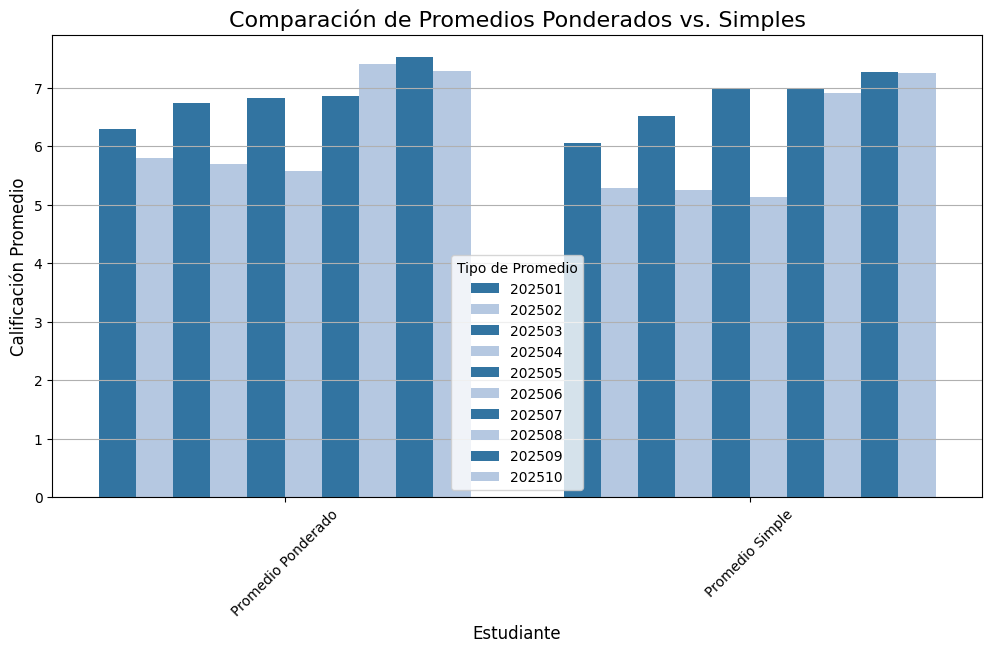

In [15]:
# Preparar datos para el gráfico de barras
df_plot = df_promedios.T.melt(ignore_index=False, var_name='Tipo de Promedio', value_name='Promedio').reset_index().rename(columns={'index': 'Estudiante'})

# Crear el gráfico de barras comparativo
plt.figure(figsize=(12, 6))
sns.barplot(x='Estudiante', y='Promedio', hue='Tipo de Promedio', data=df_plot, palette=['#1f77b4', '#aec7e8'])
plt.title('Comparación de Promedios Ponderados vs. Simples', fontsize=16)
plt.xlabel('Estudiante', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Promedio')
plt.grid(axis='y')
plt.show()

# Sección 4: Análisis de Correlación

Aquí, generamos un diagrama de dispersión para analizar la relación entre el promedio simple y el promedio ponderado. Cuanto más cerca estén los puntos de la línea diagonal, más fuerte es la correlación.

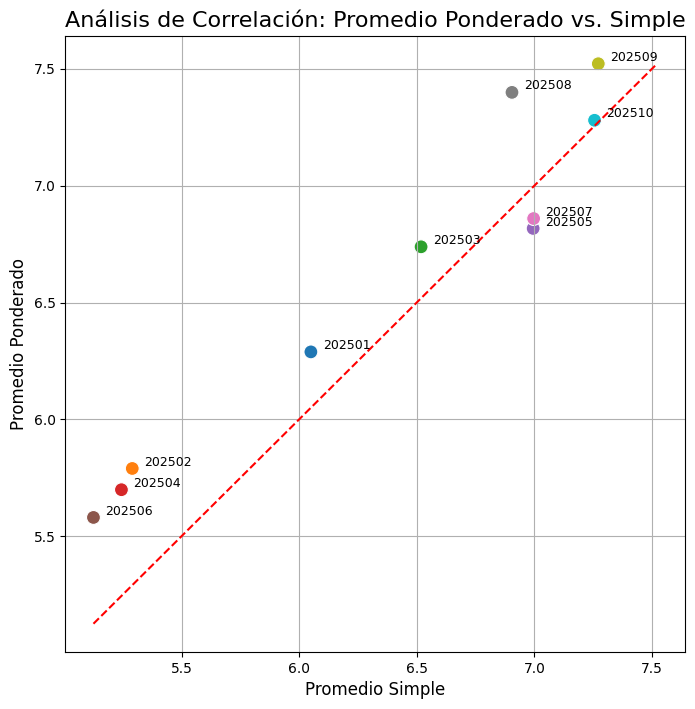

In [16]:
# Crear el diagrama de dispersión para el análisis de correlación
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_promedios, x='Promedio Simple', y='Promedio Ponderado', hue=df_promedios.index, s=100, palette='tab10')
plt.title('Análisis de Correlación: Promedio Ponderado vs. Simple', fontsize=16)
plt.xlabel('Promedio Simple', fontsize=12)
plt.ylabel('Promedio Ponderado', fontsize=12)

# Añadir la línea de referencia y = x
min_val = min(df_promedios['Promedio Simple'].min(), df_promedios['Promedio Ponderado'].min())
max_val = max(df_promedios['Promedio Simple'].max(), df_promedios['Promedio Ponderado'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

# Anotar los puntos con la matrícula de cada estudiante
for estudiante, fila in df_promedios.iterrows():
    plt.text(fila['Promedio Simple'] + 0.05, fila['Promedio Ponderado'], estudiante, fontsize=9, ha='left', va='bottom')

plt.legend().set_visible(False)
plt.grid(True)
plt.show()

# Sección 5: Matriz RREF y Dependencia Lineal

Esta sección es crucial para entender la naturaleza de nuetros datos. Usando la forma escalonada reducida por filas (RREF), obtenemos el rango de la matriz, que es el número de estudiantes que son linealmente independientes.

In [24]:
# Convertir la matriz de calificaciones a formato NumPy
matriz_calificaciones = calificaciones.values

# Convertir los valores a fracciones para SymPy, que trabaja con alta precisión simbólica
matriz_fracciones = Matrix([[Fraction(str(val)) for val in fila] for fila in matriz_calificaciones])

# Calcular la forma escalonada reducida por filas (RREF)
rref_matriz, indices_pivote = matriz_fracciones.rref()

# Convertir a decimales y redondear
rref_decimal = np.array(rref_matriz.tolist(), dtype=float)
rref_decimal = np.round(rref_decimal, 4)

print("A continuación, se muestra la matriz en su forma escalonada reducida (RREF).\n\n"
      "Observa que las primeras seis columnas tienen un '1' en la diagonal,\n"
      "lo que indica que son columnas pivote y, por lo tanto, linealmente independientes.\n\n"
      "Las últimas cuatro columnas son las que tienen valores no nulos en las primeras\n"
      "seis filas, lo que confirma su dependencia.")

print('\n')
print("### Matriz de calificaciones en RREF:")

# Mostrar como DataFrame para mejor visualización
rref_df = pd.DataFrame(rref_decimal)
display(rref_df)

# Resto del código continúa igual...

A continuación, se muestra la matriz en su forma escalonada reducida (RREF).

Observa que las primeras seis columnas tienen un '1' en la diagonal,
lo que indica que son columnas pivote y, por lo tanto, linealmente independientes.

Las últimas cuatro columnas son las que tienen valores no nulos en las primeras
seis filas, lo que confirma su dependencia.


### Matriz de calificaciones en RREF (decimales):


,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.8143,7.5997,-4.2870,-1.8288
1,0.0,1.0,0.0,0.0,0.0,0.0,0.4534,-9.3144,9.7814,4.1618
2,0.0,0.0,1.0,0.0,0.0,0.0,0.3622,3.1490,0.7467,0.6205
3,0.0,0.0,0.0,1.0,0.0,0.0,-0.2821,2.4001,-5.5582,-2.4378
4,0.0,0.0,0.0,0.0,1.0,0.0,1.1118,-4.4834,2.2023,1.3695
5,0.0,0.0,0.0,0.0,0.0,1.0,0.1690,1.6490,-1.8853,-0.8852
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000


Para determinar si nuestros datos son independientes o si existe una relación, nos basamos en un resultado clave del álgebra lineal: el rango de la matriz. El rango es el número de columnas que son linealmente independientes, es decir, que no pueden ser expresadas como una combinación de las otras.

Análisis y Justificación Numérica:

Al aplicar el análisis de rango a mi matriz de calificaciones, obtenemos los siguientes resultados:

Rango de la matriz: El rango de tu matriz de calificaciones es 6. Este es el resultado numérico que justifica tu respuesta.

Conclusión: Dado que el rango (6) es menor que el número total de columnas (10 estudiantes), concluimos que los datos no son independientes. Existe una relación entre los estudiantes. Específicamente, hay 4 estudiantes que son linealmente dependientes.

Esto significa que las calificaciones de esos 4 estudiantes pueden ser expresadas como una combinación lineal de las calificaciones de los 6 estudiantes independientes. En términos simples, sus patrones de calificación no son únicos; pueden ser "predichos" o "reconstruidos" a partir del desempeño de los otros estudiantes.